ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [18]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

- data=[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
- after sorting,
data=[30, 31, 32, 32, 33, 33, 34, 34, 35, 500]
- total elements, n=10 which is even
- median=(5th place + 6th place)/2
-       =(33+33)/2
-       33
- now, lower half is [30, 31, 32, 32, 33]
- Q1 is the median of the lower half, total count is 5 (odd).
- Q1=32
- now, upper half is [33, 34, 34, 35, 500]
- Q3 is the median of the upper half, total count is 5 (odd).
- Q3=34
- IQR= Q3-Q1=34-32=2
- lower fence=Q1-1.5*IQR=32-1.5 * 2=29
- upper fence=Q3+1.5*IQR=34 +1.5 * 2=37
- 37 < 500, So, 500 is an outlier
- ----------------------------------------------------
Mean and standard deviation are sensitive for outliers. It means if there any extreme value in the dataset, the calculation will give false result. But median and IQR are better choice for having outlier in dataset. It considers order rather than value or magnitude. It means that they ignore the extreme outlier and accurately.

In [19]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1.sort()
print(data_q1)
new=np.array(data_q1)
print(new)
median=np.median(new)
print(median)
Q1=np.percentile(new, 25)
print(Q1)
Q3=np.percentile(new, 75)
print(Q3)
IQR=Q3-Q1
print(IQR)
lower_fence=Q1-1.5*IQR
print(lower_fence)
upper_fence=Q3+1.5*IQR
print(upper_fence)

[30, 31, 32, 32, 33, 33, 34, 34, 35, 500]
[ 30  31  32  32  33  33  34  34  35 500]
33.0
32.0
34.0
2.0
29.0
37.0


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

- Here define '+' means test is positive, '-' means test is negative and 'D+' means actually has the disease, 'D-' means no disease.
- from the above:
- P(D+)=1%=0.01
- P(D-)=99%=0.99
- sensitivity=TP/(TP+FN)=P(+ | D+)=90%=0.90
- specificity=TN/(TN+FP)=P(- | D-)=92%=0.92
- PPV=TP/(TP+FP)=P(D+ | +)
- now,
- TP=P(+ | D+) * P(D+)=0.9 * 0.01=0.009
- FP=P(+ | D-) * P(D-)=(1-0.92) * 0.99=0.0792
- Total Positive, P(+)= 0.009+0.0792=0.0882
- PPV, P(D+ | +)
- = ( P(+ | D+) * P(D+) ) / P(+) [using Bayes Theorem]
- = (0.90 * 0.01) / 0.0882
- =0.102= 10.2%
-----------------------------------------------------------------------------
- FN=P(- | D+) * P(D+)=0.1 * 0.01 =0.001
- TN=P(- | D-) * P(D-)=0.92 * 0.99= 0.9108
- Total= 0.009+0.0792+0.001+0.9108=1.00
- Prevalence P(D+) = (TP+FN)/Total= (0.009+0.001)/1=0.01
- now,
- prevalence= 0.2
- TP+FN=0.2
- P(D+) = 0.2
- P(D-) = 0.8
- TP= 0.9 * 0.2= 0.18
- FP= 0.08* 0.8= 0.064
- PPV= 0.18/(0.18+0.064)=0.7377=73.77% > 10.2%
- So, the PPV will increase.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

Answer-1:
- The ML task is Binary classification Problem. Our target is to identify premium_user where the value is 0 or 1. As there is only 2 values then it can be called as binary classification ML task
-------------------------------------------------------------------------------
Answer-2:
- 4 Preprocesing Steps:
- Missing value handling-> if there is any missing value in features then mean,mode, median should apply depending on the corresponding dataset.
- Categorical Encoding-> here region is categorical. One hot encoding or ordinal encoding.
- Scaling-> For numerical data, different kinds of scaling can be used like standard scaling, min-max scaling.
- Remove outliers-> for numerical data , outliers can be easily handled using some methods like log transformation,winsorization.
-------------------------------------------------------------------------------
Answer-3:
- ML Pipeline I will follow:
First of all i will do numerical pipeline for scaling. Then Categorical pipeline for encoding. After that i will choose a suitable classification model.I will split the dataset into training and testing.Before Train the model, the hyperparameter needs to be set or tuned. Then Train the model using Training dataset. Next, I will predict the value of the target using test dataset. Then Calculate the score like recall, precision, accuracy, F1 score. These will me to determine the model's accuracy rate.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [20]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

# *Determining EDA and Plotting*

----Missing value each column--------
age             2
region          0
purchases       1
premium_user    0
dtype: int64
----Total Unique value each column--------
age             5
region          4
purchases       6
premium_user    2
dtype: int64
----Correlation with each column--------
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


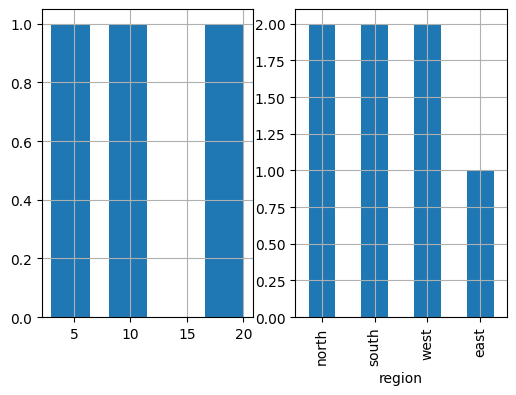

In [21]:
# for EDA  and plotting:
print("----Missing value each column--------")
print(df.isnull().sum()) # for showing the missing value
print("----Total Unique value each column--------")
print(df.nunique()) # for showing the unique values
print("----Correlation with each column--------")
print(df.corr(numeric_only=True)) # for correlation with each other of numerical features


plt.subplot(1, 2, 1) # row 1 , column 2, index 1
plt.hist(df['purchases'])

plt.subplot(1, 2, 2) # row 1 , column 2, index 2
df['region'].value_counts().plot(kind='bar')
plt.show()

# *Preprocesing*

In [22]:
# Preprocessing Part:

age=SimpleImputer(strategy='median') # Impute Age (Median)
df['age']=age.fit_transform(df[['age']])

purchase=SimpleImputer(strategy='mean') # Impute Purchases (Mean)
df['purchases']=purchase.fit_transform(df[['purchases']])

df_encoded=pd.get_dummies(df, columns=['region'], prefix='region', dtype=int) # One Hot Encode Region

scaler=RobustScaler() # Scale all numeric columns using RobustScaler
numeric_columns=['age', 'purchases']
df_encoded[numeric_columns]=scaler.fit_transform(df_encoded[numeric_columns])
df_encoded

,age,purchases,premium_user,region_east,region_north,region_south,region_west
0,-0.5,-0.943820,0,0,1,0,0
1,0.0,0.000000,1,0,0,1,0
2,0.0,-0.674157,0,0,1,0,0
3,-0.8,0.112360,0,1,0,0,0
4,1.5,1.348315,1,0,0,0,1
5,2.2,1.078652,1,0,0,0,1
6,0.0,-0.134831,0,0,0,1,0


# *one domain driven feature*

In [23]:
df_encoded['high_spender']=df_encoded['age'] * df_encoded['purchases']
df_encoded

,age,purchases,premium_user,region_east,region_north,region_south,region_west,high_spender
0,-0.5,-0.943820,0,0,1,0,0,0.471910
1,0.0,0.000000,1,0,0,1,0,0.000000
2,0.0,-0.674157,0,0,1,0,0,-0.000000
3,-0.8,0.112360,0,1,0,0,0,-0.089888
4,1.5,1.348315,1,0,0,0,1,2.022472
5,2.2,1.078652,1,0,0,0,1,2.373034
6,0.0,-0.134831,0,0,0,1,0,-0.000000


---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [24]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

# *Train Test Split*

In [25]:
x=df2[['area_sqft', 'bedrooms']] # features
y=df2['price'] # target variable
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42) # split data into 80% training and 20% test.

# *Linear Regression*

In [26]:
model=LinearRegression() # create an object of linear regression
model.fit(X_train, y_train) # fit the training data using linear regression model

LinearRegression()

# *Coefficients* and Predictions

In [27]:
intercept=model.intercept_ # determine c value of y=mx+c line
coeff=model.coef_[0] # determine m value of y=mx+c line
y_pred=model.predict(X_test) # predict the model with testing data

print(f"Intercept: {intercept:.3f}")
print(f"Coefficients: {coeff:.3f}")
print(f"Test Predictions: {y_pred}")

Intercept: -33.846
Coefficients: 0.154
Test Predictions: [100.         130.76923077]


# *Metrics*

In [28]:
MAE=mean_absolute_error(y_test, y_pred) # Mean absolute error calculation
RMSE=np.sqrt(mean_squared_error(y_test, y_pred)) # root mean square error calculation
R2=r2_score(y_test, y_pred) # Co-efficient of determination calculation

print(f"MAE: {MAE:.3f}")
print(f"RMSE: {RMSE:.3f}")
print(f"R2: {R2:.3f}")

MAE: 19.615
RMSE: 19.619
R2: -0.711


# *Residual Plot*

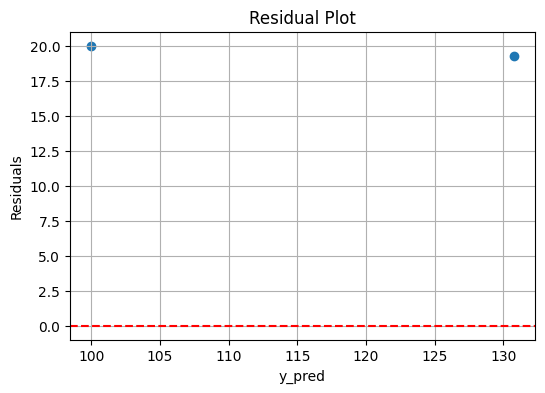

In [29]:

residuals=y_test-y_pred # Calculating residuals for the test set

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.scatter(y_pred,residuals)
plt.show()

- Explanation:
The residuals are consistently positive around +20 for both test points. The model is trying to understand the price rate step by step. The actual price is higher than the predicted one. here y=0 line is used to visualize the error about the predicted dataset. if the training dataset become larger then the model may produce less errored prediction value.

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [30]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

# *Metrics Calculation for threshold 0.5 and 0.3: confusion matrix, precision, recall, f1 score*

In [31]:
def get_metrics(y_true,y_prob,threshold):
    y_pred=(y_prob>=threshold).astype(int) # predicting the probability with the threshold.
    CM=confusion_matrix(y_true,y_pred) # draw the confusion matrix for that threshold
    Precision=precision_score(y_true,y_pred) # calculate the precision score
    Recall=recall_score(y_true,y_pred) # calculate the recall score
    F1=f1_score(y_true,y_pred) # calculate the F1 score.

    return CM,Precision,Recall,F1

# for threshold 0.5:
print("--- Threshold 0.5 ---")
Confusion_matrix,Precision,Recall,F1_score=get_metrics(y_true,y_prob,0.5) # function call for 0.5 threshold
print(f"Confusion Matrix:\n{Confusion_matrix}")
print(f"Precision: {Precision:.3f}, Recall: {Recall:.3f}, F1: {F1_score:.3f}")


# for threshold 0.3
print("\n--- Threshold 0.3 ---")
Confusion_matrix,Precision,Recall,F1_score=get_metrics(y_true,y_prob,0.3)
print(f"Confusion Matrix:\n{Confusion_matrix}")
print(f"Precision: {Precision:.3f}, Recall: {Recall:.3f}, F1: {F1_score:.3f}")

--- Threshold 0.5 ---
Confusion Matrix:
[[5 0]
 [0 5]]
Precision: 1.000, Recall: 1.000, F1: 1.000

--- Threshold 0.3 ---
Confusion Matrix:
[[3 2]
 [0 5]]
Precision: 0.714, Recall: 1.000, F1: 0.833


- Explanation: Lowering the threshold from 0.5 to 0.3 makes the model to make some changes in predicting Positive. It predicts all the true positives as recall is 1.0. But it also incorrectly predicts some negative instances as positive which increases the False Positives value.Consequently, Precision decreases because the threshold for the positive predictions decreases, while recall stays high.

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._

# *ROC Curve*

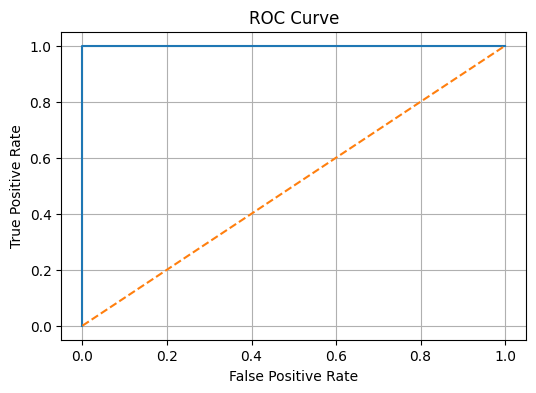

In [32]:
FPR,TPR,thresholds=roc_curve(y_true, y_prob)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# *AUC Calculate*

In [33]:
AUC=auc(FPR,TPR)
print(f"AUC: {AUC:.3f}")

AUC: 1.000


- Explanation: The value of AUC is 1 which represent a perfect classifier. It means that for any randomly chosen positive data and negative data, the model always predicts a higher probability to the positive result than the negative one. 2 classes are properly separarted.

# *Decision Tree Classifier:*

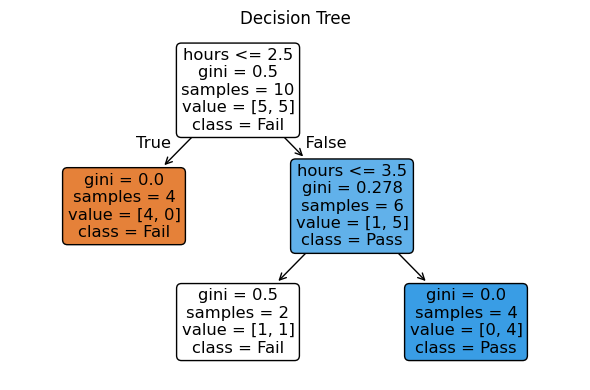

In [34]:
df3=pd.DataFrame({
    "hours":[1,2,3,4,5,1,2,3,4,5],
    "passed":[0,0,0,1,1,0,0,1,1,1]
})
x=df3[['hours']]
y=df3['passed']

tree=DecisionTreeClassifier(max_depth=2,random_state=42)
tree.fit(x,y)

plot_tree(tree,feature_names=['hours'],class_names=['Fail','Pass'],filled=True,rounded=True) # 0 for fail, 1 for pass
plt.title("Decision Tree")
plt.tight_layout()
plt.show()

- Explanation: As the depth is 2, the tree is very small. it has only couple of splits.Since it is likely underfit. we need more dataset for generalize well. Larger dataset can create overfit problem but after pruning it can be generalized well.